# Лабораторная работа 4
## Исследование функции (Wolfram)

Для заданной формулой функции найти:
1. Область определения функции.
2. Является ли функция четной или нечетной, является ли периодической.
3. Точки пересечения графика с осями координат.
4. Промежутки знакопостоянства.
5. Промежутки возрастания и убывания.
6. Точки экстремума и значения в этих точках.
7. Непрерывность. Наличие точек разрыва и их классификация.
8. Асимптоты.

Построить график функции, асимптоты, промежутки знакопостоянства.

Вариант 7.
Функция: $\Large{\frac{ln(x - 1)}{(x - 1)^2}}$

FormBox[FractionBox[RowBox[{"log", "(", RowBox[{"x", "-", "1"}], ")"}], 

 
>       SuperscriptBox[RowBox[{"(", RowBox[{"x", "-", "1"}], ")"}], "2"]],\
 
>    TraditionalForm]
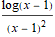

In [1]:
f[x_] :=  Log[x - 1] / (x - 1)^2;
f[x] //TraditionalForm

### График функции

-Graphics-
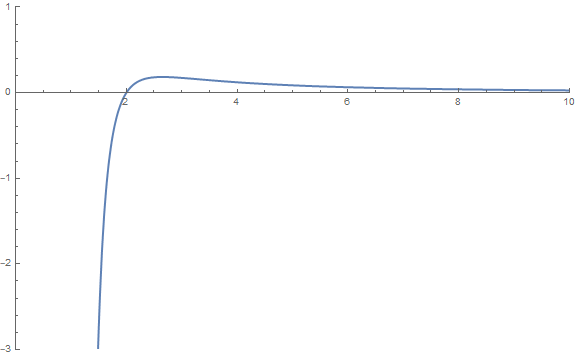

In [3]:
plotFunc = Plot[
            f[x], 
            {x, 1, 10}, 
            PlotRange->{{0, 10}, {-3, 1}}, 
            PlotStyle->{Thickness[.005]}, 
            ImageSize->Large
        ]

### Область определения

$\begin{aligned}
\begin{cases}
   (x - 1)^2 \neq 0, 
   \\
   x - 1 > 0.
\end{cases}
\end{aligned} \Rightarrow x > 1$

### Чётность, периодичность

Функция не является ни чётной, ни нечётной из-за несимметричной области определения. На всякий случай проверим это при помощи Wolfram.

In [4]:
isEven = f[x] == f[-x] //TautologyQ
isOdd = f[x] + f[-x] == 0 //TautologyQ

False
False

Оба выражения ложны. Значит, функция действительно не является ни чётной, ни нечётной.

Докажем отсутствие периодичности.

In [6]:
FunctionPeriod[f[x], x]

0

Получили значение 0, значит периодичность отсутствует.

### Точки пересечения графика с осями координат

In [7]:
sols = Solve[f[x]==0, x];
points = {x, 0}/.sols

{{2, 0}}

In [9]:
f[2]

0

Получили, что график пересекает ось абсцисс в точке $(2; 0)$. Пересечения с осью ординат отсутствуют из-за области определения функции.

### Промежутки знакопостоянства

Рассмотрим значения функции слева и справа от точки $(2; 0)$.

In [10]:
f[2-0.1]

-0.130075

In [11]:
f[2+0.1]

0.0787687

Слева от точки функция принимает отрицательные значения, справа - положительные.

Следовательно, функция положительна при $x \in (2; +\infty)$, отрицательна при $x \in (1; 2)$.

-Graphics-
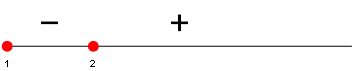

In [12]:
Show[
    Graphics[Line[{{1, 0}, {5, 0}}]],
    Graphics[{PointSize[0.03], Point[{1, 0}, VertexColors->Red]}],
    Graphics[Text[1, {1, -0.2}]],
    Graphics[{PointSize[0.03], Point[{2, 0}, VertexColors->Red]}],
    Graphics[Text[2, {2, -0.2}]],
    Graphics[Text[Style["-", FontSize -> Scaled[0.1]], {1.5, 0.3}]],
    Graphics[Text[Style["+", FontSize -> Scaled[0.1]], {3, 0.3}]]
]

### Промежутки возрастания и убывания. Точки экстремума

Найдём точки, производная в которых равна нулю.

-3   2 Log[-1 + x]
(-1 + x)   - -------------
                       3
               (-1 + x)
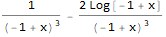

In [13]:
df = D[f[x], x]

In [14]:
Solve[df == 0, x]

{{x -> 1 + Sqrt[E]}}

Нашли одну точку экстремума: $x = \sqrt{e} + 1$. Определим знак производной слева и справа от нее.

In [15]:
extremum = Exp[1/2] + 1

1 + Sqrt[E]

In [16]:
f[extremum]

1
---
2 E

In [17]:
df/.x->(extremum + 0.1)

-0.0220228

In [18]:
df/.x->(extremum - 0.1)

0.0336883

Производная слева положительная, а справа - отрицательная. Значит $\large{(\sqrt{e} + 1; \frac{1}{2e})}$ - точка максимума.

Функция возрастает при $x \in (1; \sqrt{e} + 1)$, убывает при $x \in (\sqrt{e} + 1; + \infty)$.

-Graphics-
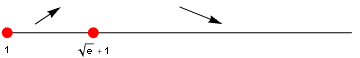

In [19]:
Show[
    Graphics[Line[{{1, 0}, {5, 0}}]],
    Graphics[{PointSize[0.03], Point[{1, 0}, VertexColors->Red]}],
    Graphics[Text[1, {1, -0.2}]],
    Graphics[{PointSize[0.03], Point[{2, 0}, VertexColors->Red]}],
    Graphics[Text[Sqrt[e]+1, {2, -0.2}]],
    Graphics[Arrow[{{Exp[0.5] / 2 + 0.5, 0.1}, {Exp[0.5] / 2 + 0.8, 0.3}}]],
    Graphics[Arrow[{{3, 0.3}, {3.5, 0.1}}]]
]

### Непрерывность

Функция непрерывна на всей области определения.

### Асимптоты

Найдём горизонтальную асимптоту:

In [20]:
Limit[f[x], x->Infinity]

0

Значит, $y = 0$ - горизонтальная асимптота.

Найдём вертикальную асимптоту:

In [21]:
Limit[f[x], x->1]

-Infinity

В точке $x = 1$ функция стремится к бесконечности, значит $x = 1$ - вертикальная асимптота.

Найдём наклонную асимптоту.

In [22]:
Limit[f[x] / x, x->Infinity]

0

Полученный предел равен 0, значит наклонных асимптот нет.

Построим график и его асимптоты.

In [23]:
plotAsympt1 = Plot[
                0, 
                {x, 0, 10}, 
                PlotStyle->{Red, Thickness[0.005]}, 
                ImageSize->Large
            ];

In [24]:
plotAsympt2 = Graphics[Line[{{1, -5}, {1, 1}}], ImageSize->Large];

-Graphics-
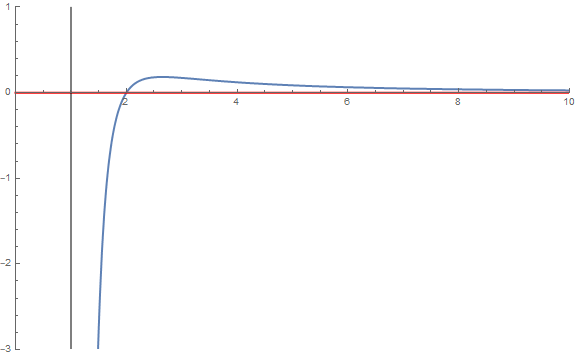

In [25]:
Show[
    plotFunc,
    plotAsympt1,
    plotAsympt2
]